In [1]:
import math
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw
import numpy as np

%matplotlib inline

## Pixel

In [2]:
class Pixel:
    """
    Dont forget to set class variables 'is_a_star' and 'target' before using this class.
    """

    is_a_star = False  # False -> Best First Search, True-> A*
    target = (5, 7)  # Target to which we calculate the Heuristic Function

    def __init__(self, x, y, color, parent_cost):
        self.x = x
        self.y = y
        self.color = color
        self.cost = parent_cost + Pixel.get_pixel_cost(color)

        
    # Evaluating Pixel Values

    def h(self):
        """ Heuristic Function"""
        return Pixel.manhattan_distance(self.x, self.y, Pixel.target[0], Pixel.target[1])

    def g(self):
        """ Cost Function"""
        return self.cost

    def f(self):
        if not Pixel.is_a_star:
            return self.h()  # -> Best First Search
        return self.h() + self.g()  # -> A *

    
    # Comparing Pixels

    def __lt__(self, other):
        return self.f() < other.f()

    def __le__(self, other):
        return self.f() <= other.f()

    def __gt__(self, other):
        return self.f() > other.f()

    def __ge__(self, other):
        return self.f() >= other.f()

    def __eq__(self, other):
        return self.f() == other.f()

    def __ne__(self, other):
        return self.f() != other.f()

    
    # Printing Pixels

    def __repr__(self):
        return f"(x={self.x},y={self.y},color={self.color}, g()={self.cost}, h()={self.h()}, f()={self.f()})"

    def __str__(self):
        return f"(x={self.x},y={self.y},color={self.color}, g()={self.cost}, h()={self.h()}, f()={self.f()})"
    
    
    # Utility Methods
    
    @staticmethod
    def get_pixel_cost(color):
        if color[0] == 0:
            return 1
        return 1 / (color[0])  # Reverse of the 'red' in RGB   

    @staticmethod
    def euclidean_distance(x1, y1, x2, y2):
        return math.sqrt((x1 ** 2 - x2 ** 2) + (y1 ** 2 - y2 ** 2))

    @staticmethod
    def manhattan_distance(x1, y1, x2, y2):
        return abs(x1 - x2) + abs(y1 - y2)


## Priority Queue

### With Heap

In [3]:
class PriorityQueue:
    
    def __init__(self, initial_elements: list, comparator, max_redundant_element_count=100):
        self.comparator = comparator
        self.max_redundant_element_count = max_redundant_element_count    # See delete method
        self.heap = self.heapify(initial_elements)
        self.length = len(self.heap)

    def heapify(self, elements: list):
        """
        Takes list of elements, returns Heap
        Complexity: O(n)   
        """
        
        if not elements:                     # If elements is empty
            return []                        # return empty list as heap
        
        last_index = len(elements) - 1  # Get Last Element's index
        parent_of_last_index = (last_index - 1) // 2  # Get Last Element's Parent's index
        # After last parent the tree, there is no subtree to adjust 
        for i in range(parent_of_last_index, -1, -1):
            # Starting from last parent, assuming the given 'i' as the root of the subtree, down_heap
            self.down_heap(elements, len(elements), root_index=i)
        return elements  # Return the heap
    
    def insert(self, x):
        """
         Complexity: O(logN)
        """
        i = self.length  # index of the x
        parent_i = (i - 1) // 2  # index of x's parent      
        
        self.heap.append(x)  # Insert x into its index
        self.length += 1

        while i > 0 and self.comparator(x, self.heap[parent_i]):
            self.heap[i] = self.heap[parent_i]  # put the parent into x's place
            i = parent_i  # Update x's index, hypothetically x is there
            parent_i = (i - 1) // 2  # Calculate x's new parent's index
        self.heap[i] = x  # Insert x into its real place

    def delete(self):
        """
        Complexity = O(logN)
        """

        deleted_element = self.heap[0]  # Delete the root by taking and putting last el into its place
        self.heap[0] = self.heap[self.length - 1]  # Put the last element into root of the tree
        self.down_heap(self.heap, length=self.length)  # Adjust the tree so that it becomes heap again
        self.length -= 1  # Exclude last element since it is no longer inside the heap
        
        # If list grows so much, deallocate the unnecessary space
        actual_length = len(self.heap)
        if (actual_length - self.length) > self.max_redundant_element_count:
            self.heap = self.heap[:self.length]

        return deleted_element
    
    def is_empty(self):
        return self.length == 0
    
    def down_heap(self, heap: list, length, root_index=0):
        i = root_index  # Start from given subtrees root
        max_child = self.get_max_priority_child_index(heap, length, i)  # Get max priority child's index
        while (max_child is not None) and self.comparator(heap[max_child], heap[i]):
            # while child exists and child greater than parent, swap them
            heap[i], heap[max_child] = heap[max_child], heap[i]  # Swap
            i = max_child  # Update node's index
            max_child = self.get_max_priority_child_index(heap, length, i)

    def get_max_priority_child_index(self, heap, length, index):
        last_index = length - 1
        if last_index < (index * 2 + 1):  # No child
            return None
        elif last_index < (index * 2 + 2):  # Only Left Child exists
            return index * 2 + 1
        else:  # Both children exists
            if self.comparator(heap[index * 2 + 1], heap[index * 2 + 2]):
                return index * 2 + 1  # Return Left Child as Max Priority child
            else:
                return index * 2 + 2  # Return Right Child as Max Priority child

    def __repr__(self):
        result = "[\n"
        for i in range(0,self.length):
            result += str(i) + ":" + str(self.heap[i]) + "\n"
        result += "]"
        return result

    def __str__(self):
        result = "[\n"
        for i in range(0,self.length):
            result += str(i) + ":" + str(self.heap[i]) + "\n"
        result += "]"
        return result

### With List


In [4]:
class Queue:
    
    def __init__(self, capacity=100):
        self.internal_list = [None] * capacity
        self.capacity = capacity
        self.front = 0
        self.rear = capacity - 1
        self.size = 0
        
    def insert(self, x):
        if self.is_full():
            print("Queue is Full!")
            return 

        self.rear = (self.rear + 1) % self.capacity
        self.internal_list[self.rear] = x
        self.size += 1
        
        
    def delete(self):
        if self.is_empty():
            print("Queue is Empty!")
            return None
        
        deleted_item = self.internal_list[self.front]
        self.front = (self.front + 1) % self.capacity
        self.size -= 1
        
        return deleted_item
        
    def is_empty(self):
        return self.size == 0
    
    def is_full(self):
        return self.capacity == self.size

    def sort(self):
        """ Using Insertion Sort """
        for i in range(self.front+1, self.rear+1):
            temp = self.internal_list[i]
            j = i - 1
            
            while j >= self.front and self.internal_list[j] > temp:
                self.internal_list[j+1] = self.internal_list[j]
                j -= 1
            self.internal_list[j+1] = temp
            
    
    def __repr__(self):
        result = "[\n"
        for i in range(self.front, self.rear+1):
            result += str(i) + ":" + str(self.internal_list[i]) + "\n"
        result += "]"
        return result

    def __str__(self):
        result = "[\n"
        for i in range(self.front, self.rear+1):
            result += str(i) + ":" + str(self.internal_list[i]) + "\n"
        result += "]"
        return result

In [5]:
q = Queue()

In [6]:
q.insert(Pixel(x=0,y=0,color=(55, 15, 23), parent_cost=0))
q.insert(Pixel(x=0,y=1,color=(55, 15, 23), parent_cost=0))
q.insert(Pixel(x=0,y=3,color=(55, 15, 23), parent_cost=0))
q.insert(Pixel(x=0,y=4,color=(55, 15, 23), parent_cost=0))
q.insert(Pixel(x=0,y=5,color=(55, 15, 23), parent_cost=0))

In [7]:
q

[
0:(x=0,y=0,color=(55, 15, 23), g()=0.01818181818181818, h()=12, f()=12)
1:(x=0,y=1,color=(55, 15, 23), g()=0.01818181818181818, h()=11, f()=11)
2:(x=0,y=3,color=(55, 15, 23), g()=0.01818181818181818, h()=9, f()=9)
3:(x=0,y=4,color=(55, 15, 23), g()=0.01818181818181818, h()=8, f()=8)
4:(x=0,y=5,color=(55, 15, 23), g()=0.01818181818181818, h()=7, f()=7)
]

In [8]:
q.sort()

In [9]:
q

[
0:(x=0,y=5,color=(55, 15, 23), g()=0.01818181818181818, h()=7, f()=7)
1:(x=0,y=4,color=(55, 15, 23), g()=0.01818181818181818, h()=8, f()=8)
2:(x=0,y=3,color=(55, 15, 23), g()=0.01818181818181818, h()=9, f()=9)
3:(x=0,y=1,color=(55, 15, 23), g()=0.01818181818181818, h()=11, f()=11)
4:(x=0,y=0,color=(55, 15, 23), g()=0.01818181818181818, h()=12, f()=12)
]

In [10]:
q.delete()

(x=0,y=5,color=(55, 15, 23), g()=0.01818181818181818, h()=7, f()=7)

## Image

In [11]:
image = Image.open(f'C:/Users/Yukawa/AI/rainbow.jpg', 'r')

In [12]:
pixels = image.load()

In [13]:
pixels[5,6]

(57, 14, 23)

In [14]:
def show_image(img):
    imshow(np.asarray(img))
    print(f"Size: {img.size}")

Size: (1920, 1200)


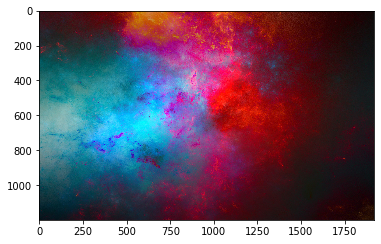

In [15]:
show_image(image)

In [16]:
def save_image(img, location=f'C:/Users/Yukawa/AI/', name="rainbow_result", extension=".jpg"):
    img.save(location+name+extension)

In [17]:
#save_image(image)

In [18]:
def draw_line(img, start_x=50,start_y=50,end_x=1750,end_y=1100,color=(255,255,255),width=10):
    draw = ImageDraw.Draw(img)
    draw.line((start_x,start_y, end_x, end_y), fill=color, width=width)

In [19]:
#draw_line(image, start_x=0,start_y=0, end_x=1920, end_y=1199,width=1)
#save_image(image)
#show_image(image)

## Best First Search

In [20]:
def insert_pixel(queue, x,y, parent_cost):
    if( x >= 0 and y >= 0 and x < 1920 and y < 1200 ):                                                   # If valid pixel
        queue.insert(Pixel(x, y, color=pixels[x, y], parent_cost=parent_cost))  # insert the pixel                                                    

### With using Heap as PriorityQueue

In [21]:
def BestFirstSearch(img, start = None, target = (1919,1199)):
    if img is None:
        return None
    pixels = img.load()                                       # load the pixel values of the img
    
    if start is None:                                         # Make sure start is set
        start = Pixel(x=0,y=0,color=pixels[0,0], parent_cost=0)
    
    Pixel.is_a_star = False                                    # f=h() only
    Pixel.target = target                                      # Target to which we calculate h()
    
    queue = PriorityQueue([start], lambda x,y:x < y)           # Min Priority Queue
    found = False
    while (queue.is_empty() == False) and (found == False):
        pixel = queue.delete()
        x = pixel.x
        y = pixel.y
        
        pixels[x,y] = (255,255,255)
        
        if x == target[0] and y == target[1]:
            found = True
            save_image(img, name="BFS")
            return img
        
        insert_pixel(queue, x+1, y, parent_cost=pixel.cost)
        insert_pixel(queue, x, y+1, parent_cost=pixel.cost)
        insert_pixel(queue, x-1, y, parent_cost=pixel.cost)
        insert_pixel(queue, x, y-1, parent_cost=pixel.cost)

In [22]:
result_BFS = BestFirstSearch(image.copy(), 
                             start=Pixel(0,0,color=pixels[0,0], parent_cost=0),
                             target=(0,50))

Size: (1920, 1200)


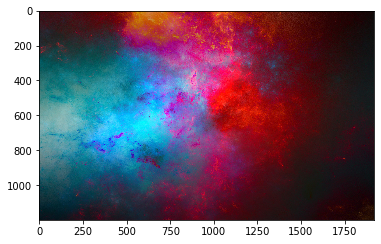

In [23]:
show_image(result_BFS)

### With Using Array as Queue

In [24]:
def BestFirstSearch2(img, start = None, target = (1919,1199)):
    if img is None:
        return None
    pixels = img.load()
    
    if start is None:
        start = Pixel(x=0,y=0,color=pixels[0,0], parent_cost=0)
    
    Pixel.is_a_star = False                                    # f=h() only
    Pixel.target = target                                      # Target to which we calculate h()
    
    queue = Queue(capacity=10_000)
    queue.insert(start)
    found = False
    while (queue.is_empty() == False) and (found == False):
        pixel = queue.delete()
        x = pixel.x
        y = pixel.y
        
        # paint the path
        pixels[x,y] = (255,255,255)
        
        # If current pixel is the target, then the path has found
        if x == target[0] and y == target[1]:
            found = True
            save_image(img, name="BFS")
            return img
        
        # Insert Neighbours
        insert_pixel(queue, x+1, y, parent_cost=pixel.cost)
        insert_pixel(queue, x, y+1, parent_cost=pixel.cost)
        insert_pixel(queue, x-1, y, parent_cost=pixel.cost)
        insert_pixel(queue, x, y-1, parent_cost=pixel.cost)
        # Sort the Queue so that first element becomes lowest cost, highest priority
        queue.sort()
    

In [25]:
result_BFS2 = BestFirstSearch2(image.copy(), 
                               start=Pixel(0,0,color=pixels[45,83], parent_cost=0),
                               target=(0,50))

Size: (1920, 1200)


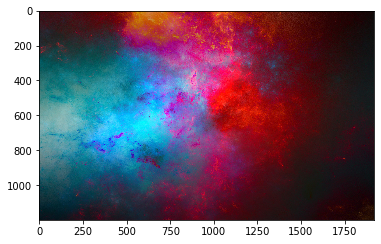

In [26]:
show_image(result_BFS2)

## A *

In [27]:
def AStar(img, start = None, target = (1919,1199)):
    if img is None:
        return None
    pixels = img.load()
    
    if start is None:
        start = Pixel(x=0,y=0,color=pixels[0,0], parent_cost=0)
    
    Pixel.is_a_star = True                                     # f=h()+g()
    Pixel.target = target                                      # Target to which we calculate h()
    queue = PriorityQueue([start], lambda x,y:x < y)           # Min Priority Queue
    found = False
    while (queue.is_empty() == False) and (found == False):
        pixel = queue.delete()
        x = pixel.x
        y = pixel.y
        
        pixels[x,y] = (255,255,255)
        
        if x == target[0] and y == target[1]:
            found = True
            save_image(img, name="a_star")
            return img
        
        insert_pixel(queue, x+1, y, parent_cost=pixel.cost)
        insert_pixel(queue, x, y+1, parent_cost=pixel.cost)
        insert_pixel(queue, x-1, y, parent_cost=pixel.cost)
        insert_pixel(queue, x, y-1, parent_cost=pixel.cost)
    

In [28]:
result_a_star = AStar(image.copy(), 
                      start=Pixel(45,83,color=pixels[45,83], parent_cost=0),
                      target=(1900,1078))

Size: (1920, 1200)


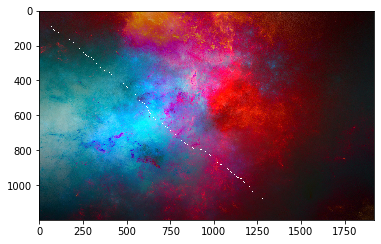

In [29]:
show_image(result_a_star)

In [30]:
def AStar2(img, start = None, target = (1919,1199)):
    if img is None:
        return None
    pixels = img.load()
    
    if start is None:
        start = Pixel(x=0,y=0,color=pixels[0,0], parent_cost=0)
    
    Pixel.is_a_star = True                                    # f=g() + h() only
    Pixel.target = target                                      # Target to which we calculate h()
    
    queue = Queue(capacity=10_000)
    queue.insert(start)
    found = False
    while (queue.is_empty() == False) and (found == False):
        pixel = queue.delete()
        x = pixel.x
        y = pixel.y
        
        # paint the path
        pixels[x,y] = (255,255,255)
        
        # If current pixel is the target, then the path has found
        if x == target[0] and y == target[1]:
            found = True
            save_image(img, name="BFS")
            return img
        
        # Insert Neighbours
        insert_pixel(queue, x+1, y, parent_cost=pixel.cost)
        insert_pixel(queue, x, y+1, parent_cost=pixel.cost)
        insert_pixel(queue, x-1, y, parent_cost=pixel.cost)
        insert_pixel(queue, x, y-1, parent_cost=pixel.cost)
        # Sort the Queue so that first element becomes lowest cost, highest priority
        queue.sort()
    

In [31]:
result_a_star = AStar2(image.copy(), 
                      start=Pixel(45,83,color=pixels[45,83], parent_cost=0),
                      target=(0,50))

In [32]:
############################################################################
########################----Functions----###################################
######## These are implemented in ImagePathFinding Class ###################
############################################################################

def save_image(img, location=f'C:/Users/Yukawa/AI/', name="rainbow_result", extension=".jpg"):
    img.save(location+name+extension)

def insert_pixel(queue, x,y, color, parent_cost):
    # Careful img sizes handwritten
    if 0 <= x < 1920 and 0 <= y < 1080:                                                   # If valid pixel
        queue.insert(Pixel(x, y, color=color, parent_cost=parent_cost))  # insert the pixel

def best_first_search(img, start=None, target=(1919, 1199)):
    if img is None:
        return None
    pixels = img.load()  # load the pixel values of the img

    if start is None:  # Make sure start is set
        start = Pixel(x=0, y=0, color=pixels[0, 0], parent_cost=0)

    Pixel.is_a_star = False  # f=h() only
    Pixel.target = target  # Target to which we calculate h()

    queue = PriorityQueue([start], lambda x, y: x < y)  # Min Priority Queue
    found = False
    while (queue.is_empty() == False) and (found == False):

        # Remove min f() element from queue
        pixel = queue.delete()
        x = pixel.x
        y = pixel.y

        # paint the path
        pixels[x, y] = (255, 255, 255)

        # If current pixel is the target, then the path has found
        if x == target[0] and y == target[1]:
            found = True
            save_image(img, name="BFS")
            return img

        # Insert Neighbours
        insert_pixel(queue, x+1,y, color=pixels[x+1,y] , parent_cost=pixel.cost)
        insert_pixel(queue, x,y+1, color=pixels[x,y+1] , parent_cost=pixel.cost)
        insert_pixel(queue, x-1,y, color=pixels[x-1,y] , parent_cost=pixel.cost)
        insert_pixel(queue, x,y-1, color=pixels[x,y-1] , parent_cost=pixel.cost)


def best_first_search2(img, start=None, target=(1919, 1199)):
    if img is None:
        return None
    pixels = img.load()

    if start is None:
        start = Pixel(x=0, y=0, color=pixels[0, 0], parent_cost=0)

    Pixel.is_a_star = False  # f=h() only
    Pixel.target = target  # Target to which we calculate h()

    queue = Queue(capacity=10_000)
    queue.insert(start)
    found = False
    while (queue.is_empty() == False) and (found == False):
        # Remove min f() element from queue
        pixel = queue.delete()
        x = pixel.x
        y = pixel.y

        # paint the path
        pixels[x, y] = (255, 255, 255)

        # If current pixel is the target, then the path has found
        if x == target[0] and y == target[1]:
            found = True
            save_image(img, name="BFS")
            return img

        # Insert Neighbours
        insert_pixel(queue, x+1,y, color=pixels[x+1,y] , parent_cost=pixel.cost)
        insert_pixel(queue, x,y+1, color=pixels[x,y+1] , parent_cost=pixel.cost)
        insert_pixel(queue, x-1,y, color=pixels[x-1,y] , parent_cost=pixel.cost)
        insert_pixel(queue, x,y-1, color=pixels[x,y-1] , parent_cost=pixel.cost)
        # Sort the Queue so that first element becomes lowest cost, highest priority
        queue.sort()


def a_star(img, start=None, target=(1919, 1199)):
    if img is None:
        return None
    pixels = img.load()

    if start is None:
        start = Pixel(x=0, y=0, color=pixels[0, 0], parent_cost=0)

    Pixel.is_a_star = True  # f=h()+g()
    Pixel.target = target  # Target to which we calculate h()

    # create queue and insert first element into queue
    queue = PriorityQueue([start], lambda x, y: x < y)  # Min Priority Queue

    found = False
    while (queue.is_empty() == False) and (found == False):
        # Remove min f() element from queue
        pixel = queue.delete()
        x = pixel.x
        y = pixel.y

        # paint the path
        pixels[x, y] = (255, 255, 255)

        # If current pixel is the target, then the path has found
        if x == target[0] and y == target[1]:
            found = True
            save_image(img, name="a_star")
            return img

        # Insert Neighbours
        insert_pixel(queue, x+1,y, color=pixels[x+1,y] , parent_cost=pixel.cost)
        insert_pixel(queue, x,y+1, color=pixels[x,y+1] , parent_cost=pixel.cost)
        insert_pixel(queue, x-1,y, color=pixels[x-1,y] , parent_cost=pixel.cost)
        insert_pixel(queue, x,y-1, color=pixels[x,y-1] , parent_cost=pixel.cost)


def a_star2(img, start=None, target=(1919, 1199)):
    if img is None:
        return None
    pixels = img.load()

    if start is None:
        start = Pixel(x=0, y=0, color=pixels[0, 0], parent_cost=0)

    Pixel.is_a_star = True  # f=h()+g()
    Pixel.target = target  # Target to which we calculate h()

    # create queue and insert first element into queue
    queue = Queue(capacity=10_000)
    queue.insert(start)

    found = False
    while (queue.is_empty() == False) and (found == False):
        # Remove min f() element from queue
        pixel = queue.delete()
        x = pixel.x
        y = pixel.y

        # paint the path with white
        pixels[x, y] = (255, 255, 255)
        # If current pixel is the target, then the path has found
        if x == target[0] and y == target[1]:
            found = True
            save_image(img, name="a_star")
            return img

        insert_pixel(queue, x+1,y, color=pixels[x+1,y] , parent_cost=pixel.cost)
        insert_pixel(queue, x,y+1, color=pixels[x,y+1] , parent_cost=pixel.cost)
        insert_pixel(queue, x-1,y, color=pixels[x-1,y] , parent_cost=pixel.cost)
        insert_pixel(queue, x,y-1, color=pixels[x,y-1] , parent_cost=pixel.cost)

        # Sort the Queue so that first element becomes lowest cost, highest priority
        queue.sort()